# Working with images

Lastly we will download images from the API and display a thumbnail grid.

We start again with importing required Python libraries:

In [4]:
from IPython.display import display     # for displaying images
from PIL import Image                   # for creating, reading, and manipulating images
import requests                         # for making http requests

## Retrieving images

Next, retrieve the image URLs from the first 9 results from the query from previous steps

In [5]:
url = 'https://www.loc.gov/collections/artists-posters/?q=color&dates=1800/1925&fa=location:united+states&fo=json'

# Make the JSON request
response = requests.get(url)

# Read the response as JSON
data = response.json()

# Get the results
results = data['results']

# Retrieve the first 9 images
image_urls = []
image_count = 9
for result in results:
    if 'image_url' not in result:
        continue
    
    # Retrieve the first image URL, which is the smallest
    image_url = result['image_url'][0] if isinstance(result['image_url'], list) else result['image_url']
    image_urls.append(image_url)

    if len(image_urls) >= image_count:
        break

## Manipulating and displaying images

And lastly download each image, place them on a grid, and display it

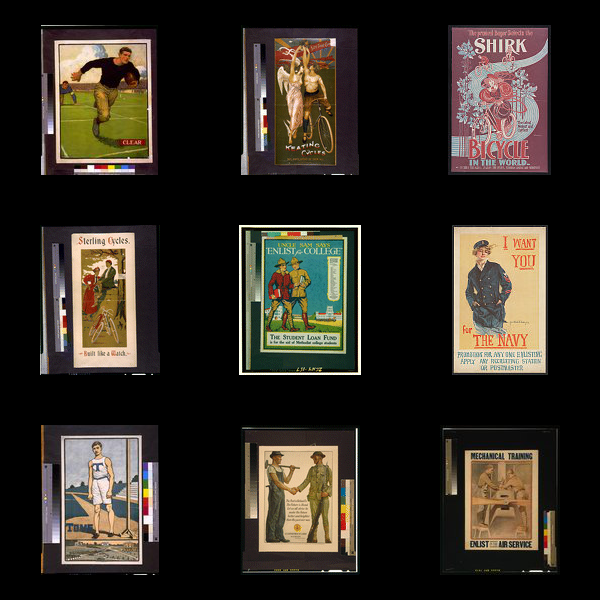

In [6]:
# Define image dimensions
image_w = 600
image_h = 600
cols = 3
rows = 3
cell_w = image_w / cols
cell_h = image_h / rows

# Create base image
base_image = Image.new("RGB", (image_w, image_h))

# Loop through image URLs
for i, url in enumerate(image_urls):
    # Download and read the image
    im = Image.open(requests.get(url, stream=True).raw)

    # Resize it as a thumbnail
    im.thumbnail((cell_w, cell_h))
    tw, th = im.size

    # Position it
    col = i % cols
    row = int(i / cols)
    offset_x = int((cell_w - tw) * 0.5) if tw < cell_w else 0
    offset_y = int((cell_h - th) * 0.5) if th < cell_h else 0
    x = int(col * cell_w + offset_x)
    y = int(row * cell_h + offset_y)

    # Paste it
    base_image.paste(im, (x, y))

# Display the result
display(base_image)

_A three-by-three matrix of color images of vintage posters with human figures and text_